# Deep Convolutional Neural Networks For Images Classification. 




# Deep Convolutional Neural Networks
- Convolution operations in one and two dimensions
- The building blocks of CNN architectures
- Implementing deep CNNs in TensorFlow
- Cat and Dogs Recognition.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.12.0


# Cats and Dogs Images Classification

In [3]:
import os, shutil, pathlib

## Set the paths

In [4]:

path = "Data_dogs-vs-cats/train/"
original_dir = pathlib.Path(path)
original_dir

WindowsPath('Data_dogs-vs-cats/train')

In [5]:

path = "Data_dogs-vs-cats_small"
new_base_dir = pathlib.Path(path)
new_base_dir

WindowsPath('Data_dogs-vs-cats_small')

### Function to make directories with subsets of [cat|dog] images

In [6]:
def make_subset(original_dir, new_base_dir, subset_name, start_index, end_index): 
    for category in ("cat", "dog"):
        
        dir = new_base_dir / subset_name / category
        shutil.rmtree(dir, ignore_errors = True)
        os.makedirs(dir)
            
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)] 
            
        for fname in fnames:
            
            shutil.copyfile(src = original_dir / fname, dst = dir / fname)


### Make subsets

In [7]:
n = 1000
d = 100

make_subset(original_dir, new_base_dir, "train", start_index = 0, end_index = n)

make_subset(original_dir, new_base_dir, "validation", start_index = n, end_index = n+d)

make_subset(original_dir, new_base_dir, "test", start_index = n+d, end_index = n+2*d)

### Load image into DataSets

In [9]:
from tensorflow.keras.utils import image_dataset_from_directory
batch_size = 32
image_w_h = 64 

image_size = (image_w_h, image_w_h) # (180, 180)

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size = image_size,
    batch_size = batch_size)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size = image_size,
    batch_size = batch_size)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size = image_size,
    batch_size = batch_size)

Found 2000 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [10]:
for item in train_dataset:
    print(item)
    break

(<tf.Tensor: shape=(32, 64, 64, 3), dtype=float32, numpy=
array([[[[8.10000000e+01, 1.46000000e+02, 1.14000000e+02],
         [8.00000000e+01, 1.45000000e+02, 1.13000000e+02],
         [7.90000000e+01, 1.44000000e+02, 1.12000000e+02],
         ...,
         [1.31000000e+02, 1.85000000e+02, 1.51000000e+02],
         [1.31000000e+02, 1.85000000e+02, 1.53000000e+02],
         [1.29882812e+02, 1.83882812e+02, 1.51882812e+02]],

        [[8.08828125e+01, 1.45882812e+02, 1.13882812e+02],
         [7.90000000e+01, 1.44000000e+02, 1.12000000e+02],
         [7.90000000e+01, 1.44000000e+02, 1.12000000e+02],
         ...,
         [1.32000000e+02, 1.86000000e+02, 1.52000000e+02],
         [1.31000000e+02, 1.85000000e+02, 1.53000000e+02],
         [1.31000000e+02, 1.85000000e+02, 1.53000000e+02]],

        [[8.15609741e+01, 1.45920349e+02, 1.14240662e+02],
         [7.99609375e+01, 1.44320312e+02, 1.12640625e+02],
         [7.90000000e+01, 1.44000000e+02, 1.12000000e+02],
         ...,
         [1

In [11]:
def count_items(ds):
    N = 0
    for _ in enumerate(ds):
        N += 1
    return N    

In [12]:
count_items(train_dataset)

63

## Generate the model

In [13]:
kernel_size = 3
dropout = 0.1

In [14]:
inputs = keras.Input(shape = (image_w_h, image_w_h, 3))

x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters = 32, kernel_size = kernel_size, activation = "relu")(x) 
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Dropout(dropout)(x)

x = layers.Conv2D(filters = 64, kernel_size = kernel_size, activation = "relu")(x) 
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Dropout(dropout)(x) 
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation = "sigmoid")(x)

model = keras.Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                             

## Compile the model

In [15]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [16]:
type(train_dataset)

tensorflow.python.data.ops.batch_op._BatchDataset

In [17]:
for i, item in enumerate(train_dataset):
    print(f"x: {item[0].shape}, y: {item[1].shape}")
    break

x: (32, 64, 64, 3), y: (32,)


## Train the model

In [18]:
history = model.fit(train_dataset,
                    epochs = 30,
                    validation_data = validation_dataset)
                    

Epoch 1/30
63/63 [==============================] - 12s 160ms/step - loss: 0.6939 - accuracy: 0.5170 - val_loss: 0.6790 - val_accuracy: 0.5900
Epoch 2/30
63/63 [==============================] - 10s 147ms/step - loss: 0.6572 - accuracy: 0.6225 - val_loss: 0.6581 - val_accuracy: 0.6100
Epoch 3/30
63/63 [==============================] - 9s 146ms/step - loss: 0.6089 - accuracy: 0.6690 - val_loss: 0.6507 - val_accuracy: 0.6150
Epoch 4/30
63/63 [==============================] - 10s 147ms/step - loss: 0.5759 - accuracy: 0.7020 - val_loss: 0.6244 - val_accuracy: 0.6250
Epoch 5/30
63/63 [==============================] - 10s 147ms/step - loss: 0.5359 - accuracy: 0.7355 - val_loss: 0.6557 - val_accuracy: 0.6450
Epoch 6/30
63/63 [==============================] - 10s 148ms/step - loss: 0.4949 - accuracy: 0.7675 - val_loss: 0.6896 - val_accuracy: 0.6600
Epoch 7/30
63/63 [==============================] - 10s 148ms/step - loss: 0.4779 - accuracy: 0.7705 - val_loss: 0.6428 - val_accuracy: 0.6600


In [20]:
hist =  history.history

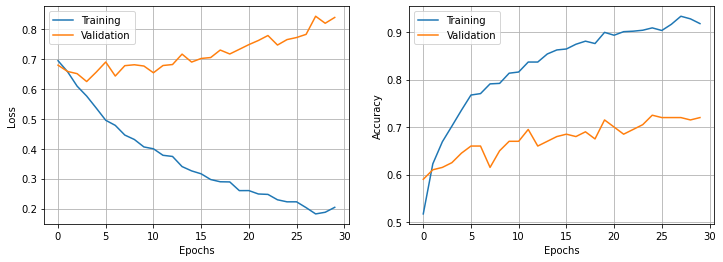

In [21]:
accuracy = hist["accuracy"]
val_accuracy = hist["val_accuracy"]
loss = hist["loss"]
val_loss = hist["val_loss"]

fig = plt.figure(figsize = (12, 4))

ax = fig.add_subplot(1, 2, 1)
ax.plot(loss, label = "Training") 
ax.plot(val_loss, label = "Validation") 
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.grid()
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy, label = "Training") 
ax.plot(val_accuracy, label = "Validation") 
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.grid()
ax.legend()

plt.show()

In [22]:
modelFile = "Deep Convolutional Neural Networks For Images Classification.callback.keras"
model.save(modelFile)

## Testing

In [23]:
test_loss, test_acc = model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 1s 49ms/step - loss: 0.7390 - accuracy: 0.7300
Test accuracy: 0.730
